<a href="https://colab.research.google.com/github/nathon-tadeo/Intro-to-ML/blob/main/homework_3_intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report

diabetes_URL = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
diabetes  = pd.read_csv(diabetes_URL)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [223]:
#Problem 1 Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes
X = diabetes.iloc[:, [0,7]].values
Y = diabetes.iloc[:, 8].values

# Split data into training (80%) and validation (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Accuracy: 0.6948051948051948
Precision: 0.5
Recall: 0.19148936170212766
F1 Score: 0.27692307692307694

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       107
           1       0.50      0.19      0.28        47

    accuracy                           0.69       154
   macro avg       0.61      0.55      0.54       154
weighted avg       0.65      0.69      0.64       154



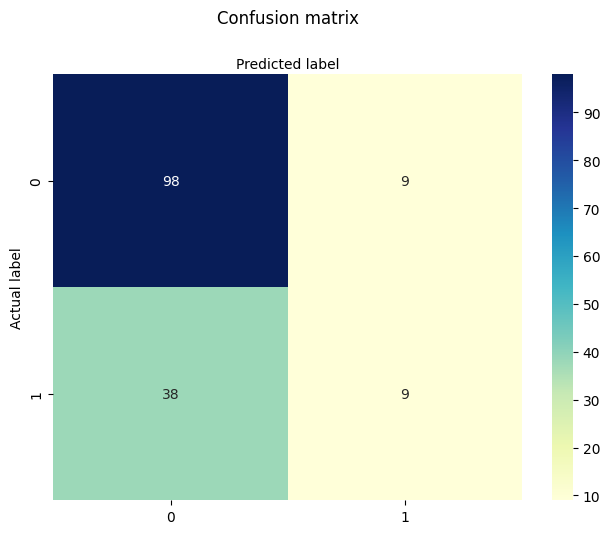

In [224]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test);

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

# Confusion Matrix plot
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

In [225]:
#Problem 2 Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign)
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

X = breast.data
Y = breast.target

# Split data into training (80%) and validation (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.20, random_state = 0)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy (weight penalty):  0.9649122807017544
Precision (weight penalty): 0.9565217391304348
Recall (weight penalty): 0.9850746268656716
F1 Score (weight penalty): 0.9705882352941176

Classification Report(weight penalty):
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96   

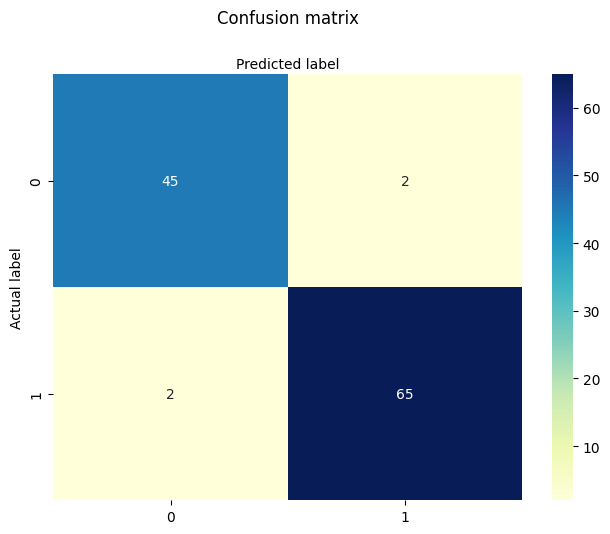

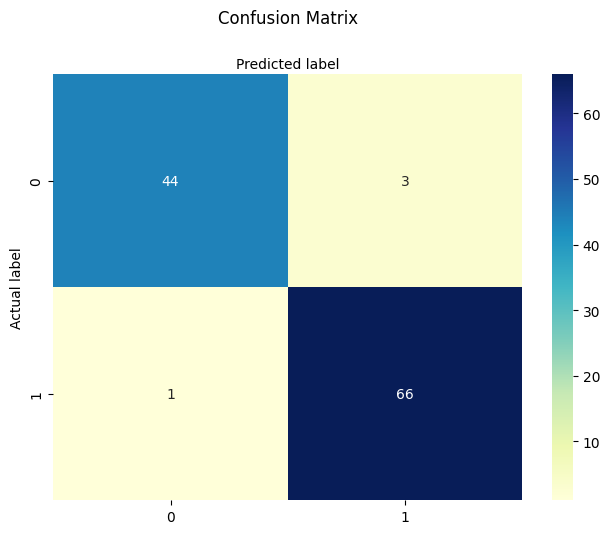

In [226]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test);

cm = confusion_matrix(Y_test, Y_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

# Confusion Matrix plot
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

#Weight Penalty
classifier = LogisticRegression(random_state=0, penalty='l2', C=0.1)  # Adjust 'C' for stronger/less regularization
classifier.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print("Accuracy (weight penalty): ", metrics.accuracy_score(Y_test, Y_pred))
print("Precision (weight penalty):", metrics.precision_score(Y_test, Y_pred))
print("Recall (weight penalty):", metrics.recall_score(Y_test, Y_pred))
print("F1 Score (weight penalty):", metrics.f1_score(Y_test, Y_pred))

# Confusion Matrix plot
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report
print("\nClassification Report(weight penalty):\n", metrics.classification_report(Y_test, Y_pred))


Naive Bayesian Model
Accuracy: 0.9035087719298246
Precision: 0.9242424242424242
Recall: 0.9104477611940298
F1 Score: 0.9172932330827067

Classification Report(weight penalty):
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



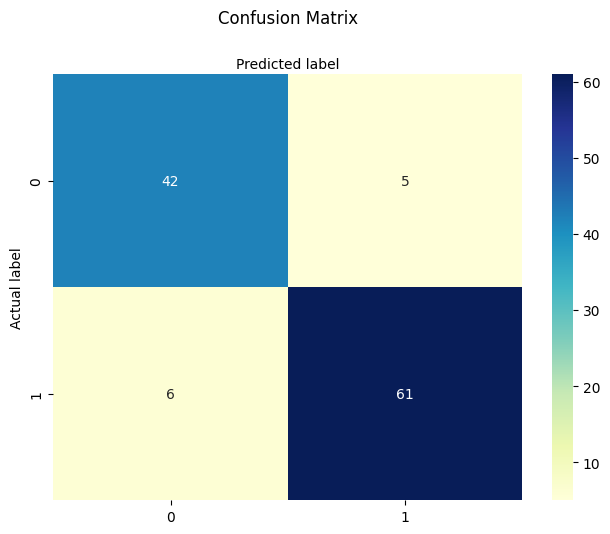

In [227]:
#Problem 3 Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign).
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

breast = load_breast_cancer()

X = breast.data
Y = breast.target

# Split data into training (80%) and validation (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.20, random_state = 0)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

nb_y_pred= nb_classifier.predict(X_test)

cm = confusion_matrix(Y_test, nb_y_pred)
print("Naive Bayesian Model")
print("Accuracy:", metrics.accuracy_score(Y_test, nb_y_pred))
print("Precision:", metrics.precision_score(Y_test, nb_y_pred))
print("Recall:", metrics.recall_score(Y_test, nb_y_pred))
print("F1 Score:", metrics.f1_score(Y_test, nb_y_pred))


# Confusion Matrix plot
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report
print("\nClassification Report(weight penalty):\n", metrics.classification_report(Y_test, Y_pred))

In [228]:
#Problem 4 Logistic Regression PCA
from sklearn.decomposition import PCA

breast = load_breast_cancer()

X = breast.data
Y = breast.target

# Split data into training (80%) and validation (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.20, random_state = 0)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lists to store metrics for different values of K
accuracies = []
precisions = []
recalls = []
f1_scores = []
k_values = list(range(1, X_train.shape[1] + 1))  # K from 1 to 30 (the number of features)

# Loop over different values of K (number of principal components)
for k in k_values:
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train logistic regression model on PCA-transformed data
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train_pca, Y_train)

    # Make predictions
    Y_pred = classifier.predict(X_test_pca)

    # Calculate and store metrics for this value of K
    accuracies.append(metrics.accuracy_score(Y_test, Y_pred))
    precisions.append(metrics.precision_score(Y_test, Y_pred))
    recalls.append(metrics.recall_score(Y_test, Y_pred))
    f1_scores.append(metrics.f1_score(Y_test, Y_pred))

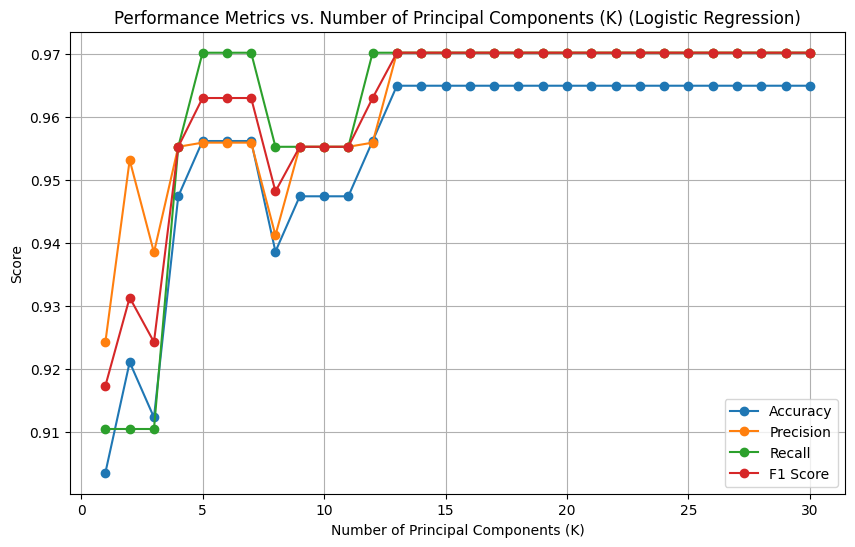

Best number of principal components (K) for highest accuracy: 13


In [229]:
# Plot Logistic Regression
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy', marker='o')
plt.plot(k_values, precisions, label='Precision', marker='o')
plt.plot(k_values, recalls, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Principal Components (K) (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best number of principal components (K) for highest accuracy: {best_k}')

In [230]:
#Problem 5 Bayes Classifier PCA
from sklearn.decomposition import PCA

breast = load_breast_cancer()

X = breast.data
Y = breast.target

# Split data into training (80%) and validation (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.20, random_state = 0)

#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lists to store metrics for different values of K
accuracies = []
precisions = []
recalls = []
f1_scores = []
k_values = list(range(1, X_train.shape[1] + 1))  # K from 1 to 30 (the number of features)

# Loop over different values of K (number of principal components)
for k in k_values:
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train logistic regression model on PCA-transformed data
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_pca, Y_train)

    # Make predictions
    Y_pred = nb_classifier.predict(X_test_pca)

    # Calculate and store metrics for this value of K
    accuracies.append(metrics.accuracy_score(Y_test, Y_pred))
    precisions.append(metrics.precision_score(Y_test, Y_pred))
    recalls.append(metrics.recall_score(Y_test, Y_pred))
    f1_scores.append(metrics.f1_score(Y_test, Y_pred))

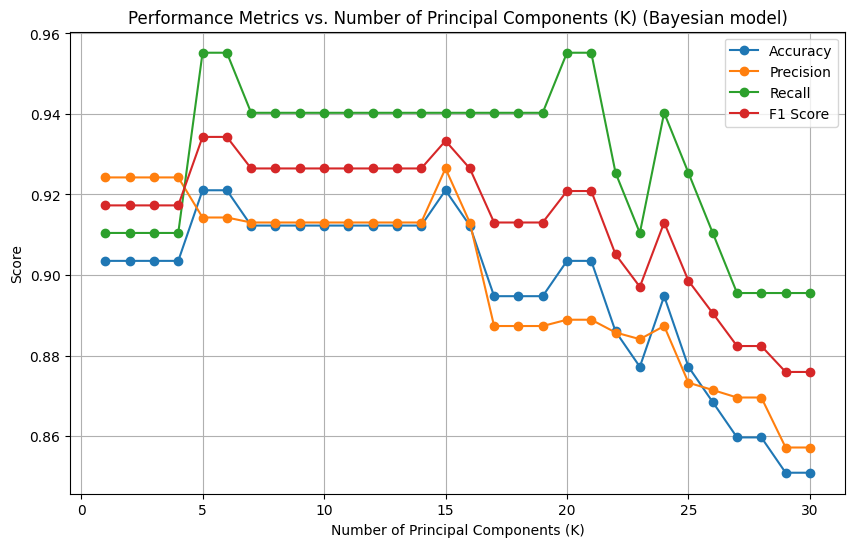

Best number of principal components (K) for highest accuracy: 5


In [231]:
# Plot Bayesian model
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy', marker='o')
plt.plot(k_values, precisions, label='Precision', marker='o')
plt.plot(k_values, recalls, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')

plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Number of Principal Components (K) (Bayesian model)')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best number of principal components (K) for highest accuracy: {best_k}')